In [82]:
# import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [83]:
# Load dataset
df=pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [84]:
df.shape

(1599, 12)

In [85]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [86]:
# Let's us consider quality value <=5 Bad(0) and quality value>5 Good(1)
df.quality=df.quality.map({3:0,4:0,5:0,6:1,7:1,8:1})

In [87]:
df.quality.value_counts() 

1    855
0    744
Name: quality, dtype: int64

Now we have a balanced data set 

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [89]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.534709
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


In [90]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.095093
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.321441
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.159129
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,-0.002160
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.109494
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.061757
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.231963
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.159110
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.003264
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.218072


<AxesSubplot:xlabel='fixed acidity', ylabel='volatile acidity'>

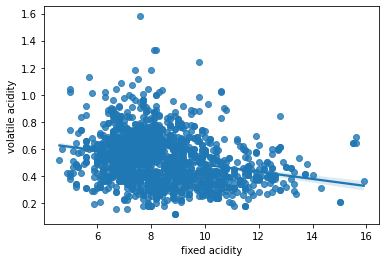

In [91]:
sns.regplot(x='fixed acidity',y='volatile acidity',data=df)

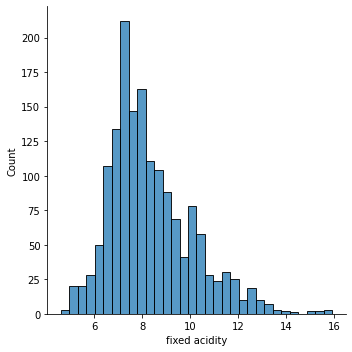

In [92]:
sns.displot(df['fixed acidity'],kind='hist')

In [93]:
# import stats from scipy to do statical analysis on features.
import  scipy.stats as sci

In [94]:
sci.describe(df['fixed acidity'])

DescribeResult(nobs=1599, minmax=(4.6, 15.9), mean=8.31963727329581, variance=3.0314163889978163, skewness=0.9818292953262073, kurtosis=1.1248563352037486)

C:\Users\cheta\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fixed acidity'>

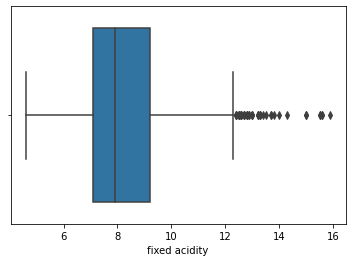

In [95]:
sns.boxplot(df['fixed acidity'])

In [96]:
# To handle outliers let us perform log transform on column
df['transformed fixed acidity']=np.log2(df['fixed acidity'])
df['transformed fixed acidity'].head()

0    2.887525
1    2.963474
2    2.963474
3    3.485427
4    2.887525
Name: transformed fixed acidity, dtype: float64

In [97]:
sci.describe(df['transformed fixed acidity'])

DescribeResult(nobs=1599, minmax=(2.2016338611696504, 3.990954860396993), mean=3.0271002003890732, variance=0.0827660155652423, skewness=0.3935453716987604, kurtosis=0.09695617987114646)

C:\Users\cheta\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='transformed fixed acidity'>

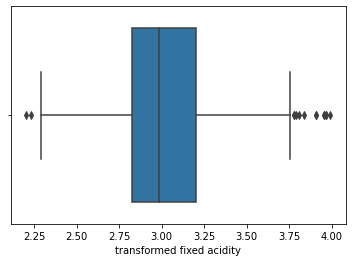

In [98]:
sns.boxplot(df['transformed fixed acidity'])

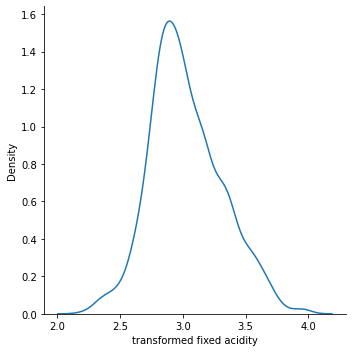

In [99]:
sns.displot(x='transformed fixed acidity',data=df,kind='kde')

In [100]:
# Applying log transformation has significantly reduced the number of outliers and made data symetrical .
# Let's view the distribution on each features 

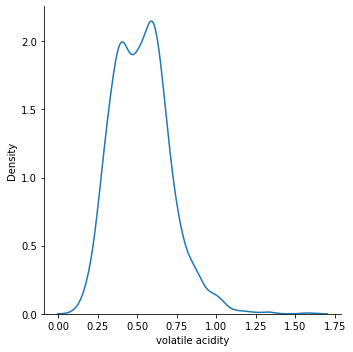

In [101]:
sns.displot(df['volatile acidity'],kind='kde')

In [102]:
sci.describe(df['volatile acidity'])

DescribeResult(nobs=1599, minmax=(0.12, 1.58), mean=0.5278205128205128, variance=0.032062377651551614, skewness=0.6709623963499574, kurtosis=1.2179633893005306)

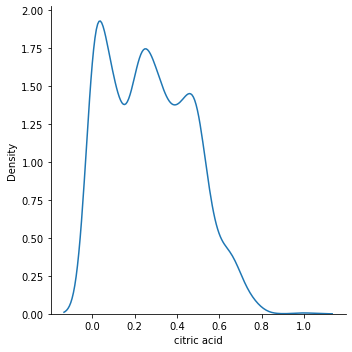

In [103]:
sns.displot(df['citric acid'],kind='kde')

In [104]:
sci.describe(df['citric acid'])

DescribeResult(nobs=1599, minmax=(0.0, 1.0), mean=0.2709756097560976, variance=0.0379474831344058, skewness=0.3180385895475358, kurtosis=-0.7902825153036646)

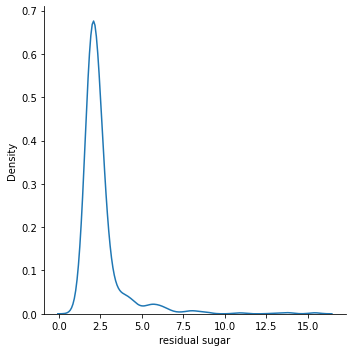

In [105]:
sns.displot(df['residual sugar'],kind='kde')

In [106]:
sci.describe(df['residual sugar'])

DescribeResult(nobs=1599, minmax=(0.9, 15.5), mean=2.53880550343965, variance=1.9878971329859632, skewness=4.536394788805638, kurtosis=28.524437824252235)

In [107]:
#residul sugar has highly skewed data
#let's apply log transform and see if there may appear any change.

In [108]:
sci.describe(np.log2(df['residual sugar']))

DescribeResult(nobs=1599, minmax=(-0.15200309344504995, 3.9541963103868754), mean=1.22662516349269, variance=0.26592772753352845, skewness=1.8051683835042416, kurtosis=4.929371722473454)

In [109]:
# significnt change after applying log transform.
df['residual sugar']=np.log2(df['residual sugar'])

In [110]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'transformed fixed acidity'],
      dtype='object')

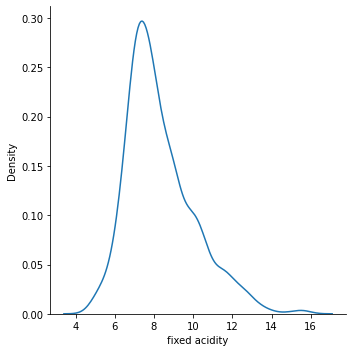

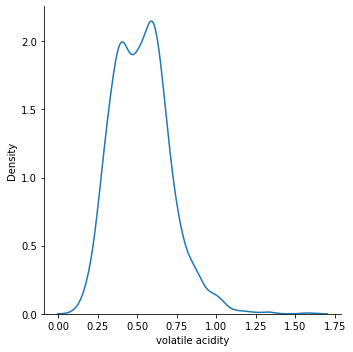

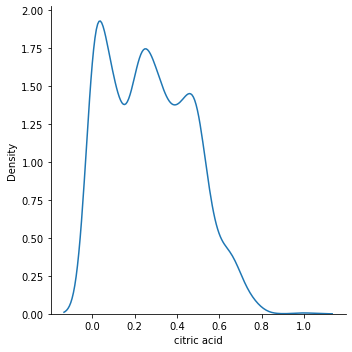

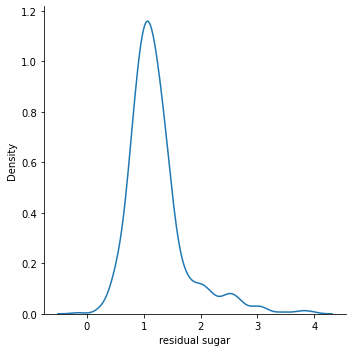

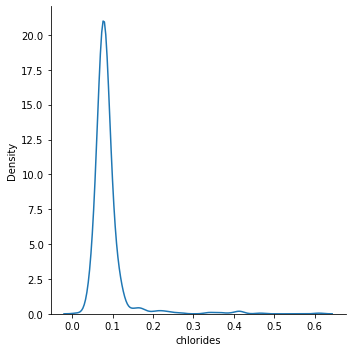

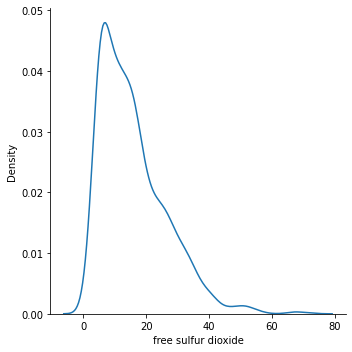

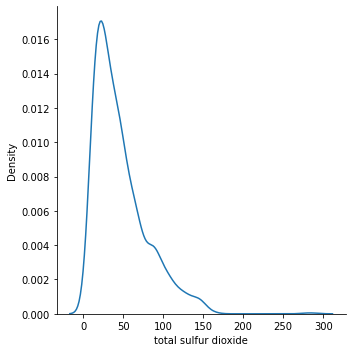

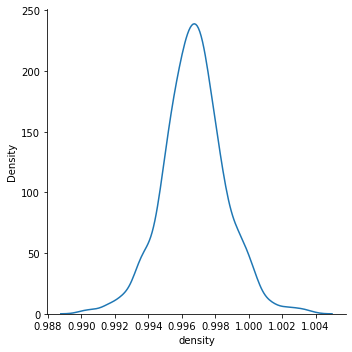

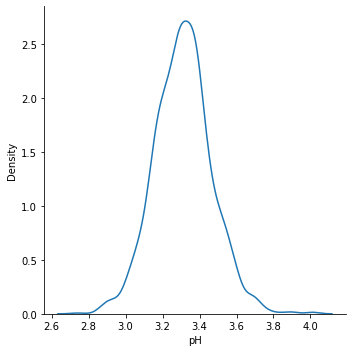

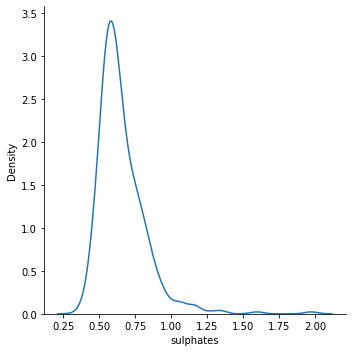

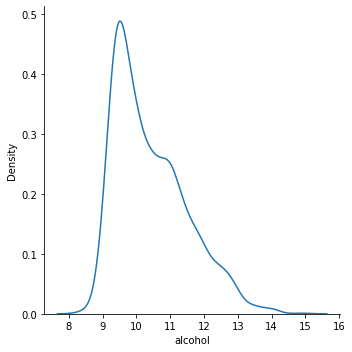

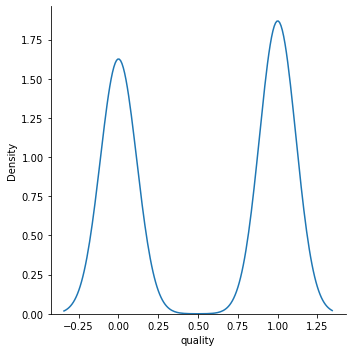

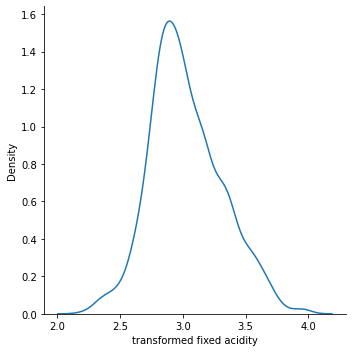

In [111]:
for feature in df.columns:
    sns.displot(df[feature],kind='kde')

In [112]:
# drop the last column that we have added.
df.drop(['transformed fixed acidity'],axis=1,inplace=True)

In [113]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [114]:
# Let's apply min max scaler to handle skewed data for all columns 

In [115]:
from sklearn.preprocessing import MinMaxScaler # to apply min_max_scaling

In [116]:
scaler=MinMaxScaler()

In [117]:
df=pd.DataFrame(scaler.fit_transform(df))

In [118]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.247788,0.397260,0.00,0.262530,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.0
1,0.283186,0.520548,0.00,0.372733,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.0
2,0.283186,0.438356,0.04,0.329657,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.0
3,0.584071,0.109589,0.56,0.262530,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,1.0
4,0.247788,0.397260,0.00,0.262530,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.0


In [119]:
df.columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

In [120]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.262530,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.0
1,0.283186,0.520548,0.00,0.372733,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.0
2,0.283186,0.438356,0.04,0.329657,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.0
3,0.584071,0.109589,0.56,0.262530,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,1.0
4,0.247788,0.397260,0.00,0.262530,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.0


In [121]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [122]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.262530,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.372733,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.329657,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.262530,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.262530,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


In [123]:
y.head()

0    0.0
1    0.0
2    0.0
3    1.0
4    0.0
Name: quality, dtype: float64

In [124]:
#Let's Create a model

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [126]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [127]:
clf=LogisticRegression(max_iter=150)

In [128]:
clf.fit(X_train,Y_train)

LogisticRegression(max_iter=150)

In [129]:
clf.score(X_test,Y_test)

0.7208333333333333

In [130]:
y_predict=clf.predict(X_test)

In [131]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score

In [132]:
print("Confusion_matrix")
confusion_matrix(Y_test,y_predict)

Confusion_matrix


array([[156,  57],
       [ 77, 190]], dtype=int64)

In [133]:
print("Precision_score")
precision_score(Y_test,y_predict)

Precision_score


0.7692307692307693

In [134]:
print("recall_score")
recall_score(Y_test,y_predict)

recall_score


0.7116104868913857

In [135]:
print("f1_score")
f1_score(Y_test,y_predict)

f1_score


0.7392996108949418

# Let's Use SVM classifier

In [136]:
from sklearn.svm import SVC

In [137]:
clf=SVC(kernel='rbf',gamma=0.3,C=10)

In [144]:
clf.fit(X_train,Y_train)

SVC(C=10, gamma=0.3)

In [145]:
clf.support_vectors_ #list of sopport vectors

array([[0.69911504, 0.23287671, 0.63      , ..., 0.19685039, 0.32335329,
        0.27692308],
       [0.2300885 , 0.28767123, 0.27      , ..., 0.51181102, 0.22754491,
        0.4       ],
       [0.25663717, 0.31506849, 0.14      , ..., 0.42519685, 0.15568862,
        0.21538462],
       ...,
       [0.37168142, 0.29452055, 0.04      , ..., 0.37007874, 0.16167665,
        0.38461538],
       [0.39823009, 0.32876712, 0.        , ..., 0.34645669, 0.17964072,
        0.30769231],
       [0.31858407, 0.35273973, 0.1       , ..., 0.43307087, 0.25149701,
        0.38461538]])

In [146]:
y_predict=clf.predict(X_test)

In [147]:
accuracy_score(Y_test,y_predict)

0.7416666666666667

In [148]:
confusion_matrix(Y_test,y_predict)

array([[161,  52],
       [ 72, 195]], dtype=int64)

In [149]:
precision_score(Y_test,y_predict)

0.7894736842105263

In [150]:
recall_score(Y_test,y_predict)

0.7303370786516854

In [151]:
f1_score(Y_test,y_predict)

0.7587548638132297

In [152]:
# Let's try different kernals and observe which performs best
models=[SVC(kernel='rbf',gamma=0.4,C=10),SVC(kernel='linear',C=10),SVC(kernel='poly',C=10,degree=3,gamma='auto')]

In [153]:
scores=[]
for x in models:
    x.fit(X_train,Y_train)
    scores.append(accuracy_score(Y_test,x.predict(X_test)))
print(scores)

[0.7395833333333334, 0.7270833333333333, 0.6645833333333333]


In [155]:
# From here i can conclude that RBF kernal is giving me the most optimal output.

In [156]:
# Let's us try Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [162]:
clf=DecisionTreeClassifier()

In [157]:
from sklearn.model_selection import GridSearchCV

In [198]:
paras={
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth':[8,9],
    'min_samples_split':[2,3],
    'min_samples_leaf':[2,3],
    'max_features':['sqrt','log2','auto']
}

In [207]:
gs=GridSearchCV(estimator=clf,param_grid=paras,cv=3,scoring='accuracy',n_jobs=-1)

In [208]:
gs.fit(X_train,Y_train)

C:\Users\cheta\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [8, 9],
                         'max_features': ['sqrt', 'log2', 'auto'],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [2, 3]},
             scoring='accuracy')

In [209]:
gs.best_estimator_

RandomForestClassifier(max_depth=9, max_features='auto', min_samples_leaf=2,
                       min_samples_split=3)

In [210]:
gs.score(X_test,Y_test)

0.7895833333333333

In [211]:
confusion_matrix(Y_test,gs.predict(X_test))

array([[167,  46],
       [ 55, 212]], dtype=int64)

In [184]:
from sklearn.ensemble import RandomForestClassifier

In [185]:
clf=RandomForestClassifier(criterion='entropy',max_depth=7,min_samples_split=3,min_samples_leaf=1,max_features='sqrt')

In [186]:
clf.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_split=3)

In [188]:
y_predict=clf.predict(X_test)

In [189]:
accuracy_score(Y_test,y_predict)

0.775

In [190]:
confusion_matrix(Y_test,y_predict)

array([[170,  43],
       [ 65, 202]], dtype=int64)

In [191]:
from sklearn.model_selection import RandomizedSearchCV

In [192]:
clf=RandomForestClassifier()

In [193]:
paras

{'criterion': ['gini', 'entropy', 'log_loss'],
 'max_depth': [8, 9],
 'min_samples_split': [1, 2],
 'min_samples_leaf': [2, 3],
 'max_features': ['sqrt', 'log2', 'auto']}

In [199]:
rs=RandomizedSearchCV(estimator=clf,param_distributions=paras,scoring='accuracy',cv=3,n_jobs=-1,error_score='raise')

In [200]:
rs.fit(X_test,Y_test)

C:\Users\cheta\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=3, error_score='raise',
                   estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [8, 9],
                                        'max_features': ['sqrt', 'log2',
                                                         'auto'],
                                        'min_samples_leaf': [2, 3],
                                        'min_samples_split': [2, 3]},
                   scoring='accuracy')

In [201]:
rs.best_estimator_

RandomForestClassifier(criterion='log_loss', max_depth=8, max_features='auto',
                       min_samples_leaf=2)

In [203]:
rs.score(X_test,Y_test)

0.95

In [204]:
y_predict=rs.predict(X_test)

In [205]:
accuracy_score(Y_test,y_predict)

0.95

In [206]:
confusion_matrix(Y_test,y_predict)

array([[199,  14],
       [ 10, 257]], dtype=int64)

# Summary

#decresing order of accuracy score obtained different classifers.

1 RandomForestClassifier (95%)

2 DecisionTreeClassifier (78%)

3 SVC (74%)

4 LogisticRegression (72%)